##Make and Draw Graphs

In [1]:
# Need to force reloading of modules before execution
%load_ext autoreload
%autoreload 2

%aimport pickle

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
voteweights = pickle.load( open("process_votes.p", "rb" ) )

In [3]:
voteweights['Borneo']

1,Richard,Kelly,Rudy,Susan,Sean,Colleen,Gervase,Jenna,Greg,Gretchen,Joel,Dirk,Ramona,Stacey,B.B.,Sonja
1,,,,,,,,,,,,,,,,
Richard,None,5,9,8,5,0,0,1,0,0,0,1,0,0,0,0
Kelly,None,None,6,6,2,1,0,1,0,0,0,0,0,2,0,1
Rudy,None,None,None,9,6,0,0,1,0,0,0,2,0,0,0,0
Susan,None,None,None,None,6,0,0,1,0,0,0,2,0,0,0,0
Sean,None,None,None,None,None,0,0,1,0,0,0,2,0,0,0,0
Colleen,None,None,None,None,None,None,4,4,2,3,2,0,1,0,0,0
Gervase,None,None,None,None,None,None,None,2,1,1,2,0,2,0,0,0
Jenna,None,None,None,None,None,None,None,None,1,3,2,0,1,0,0,0
Greg,None,None,None,None,None,None,None,None,None,1,0,0,0,0,1,0


In [9]:
%%writefile make_graphs.py

# Make network graphs
import pandas as pd
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def make_graph(votes):
    
    # Create adjacency matrix
    votes = votes.fillna(0) #convert None to zeroes
    votes_matrix = votes.as_matrix() #creates numpy array
    votes_matrix = np.matrix(votes_matrix) #creates matrix

    # Make graph
    G = nx.from_numpy_matrix(votes_matrix)
    
    # Rename nodes
    names = list(votes.columns.values)
    nodeints = list(range(len(names)))
    rename = {}
    for i in nodeints:
        rename[i] = names[i]
    G = nx.relabel_nodes(G, rename)
        
    return G


def make_all_graphs(voteweights, save_to_disk=True):
    graphs = {}
    for i in voteweights.keys():
        graphs[i] = make_graph(voteweights[i])
    
    if save_to_disk:
        pickle.dump(graphs, open( "make_graphs.p", "wb" ) )
    return graphs


def draw_graph(G, vw, weighted=False):
    
    # color nodes differently for top 4 finishers
    top4 = list(vw.columns[:4])
    others = list(vw.columns[4:])
    
    plt.figure(figsize=(15,15))
    pos = nx.spring_layout(G, k=0.9, iterations=15, scale=0.5) 

    # nodes
    nx.draw_networkx_nodes(G, pos, nodelist=top4, node_size=1500, 
                           node_color='yellow', alpha=0.6)
    
    nx.draw_networkx_nodes(G, pos, nodelist=others, node_size=1000, 
                           node_color='lightblue', alpha=0.6)
    
    # edges
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    
    # labels
    if weighted == True:           
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    
    nx.draw_networkx_labels(G,pos,font_size=15,font_family='sans-serif')


    plt.axis('off')
    plt.show()

Overwriting make_graphs.py


### Make all season graphs

In [10]:
from make_graphs import *

graphs = make_all_graphs(voteweights)

In [11]:
graphs

{u'Africa': <networkx.classes.graph.Graph at 0x108c4bc50>,
 u'All-Stars': <networkx.classes.graph.Graph at 0x108c4bbd0>,
 u'Blood_vs._Water': <networkx.classes.graph.Graph at 0x108c4b710>,
 u'Borneo': <networkx.classes.graph.Graph at 0x108c4b4d0>,
 u'Cagayan': <networkx.classes.graph.Graph at 0x108c4b9d0>,
 u'Cambodia': <networkx.classes.graph.Graph at 0x108c4b6d0>,
 u'Caramoan': <networkx.classes.graph.Graph at 0x108c4bad0>,
 u'China': <networkx.classes.graph.Graph at 0x108c4b8d0>,
 u'Cook_Islands': <networkx.classes.graph.Graph at 0x108c4bcd0>,
 u'Fiji': <networkx.classes.graph.Graph at 0x108c4bc10>,
 u'Gabon': <networkx.classes.graph.Graph at 0x108c4bb10>,
 u'Guatemala': <networkx.classes.graph.Graph at 0x108c4b890>,
 u'Heroes_vs_Villains': <networkx.classes.graph.Graph at 0x108c4b850>,
 u'Marquesas': <networkx.classes.graph.Graph at 0x108c4b750>,
 u'Micronesia': <networkx.classes.graph.Graph at 0x108c4bb50>,
 u'Nicaragua': <networkx.classes.graph.Graph at 0x108c4bd50>,
 u'One_World

### Test for weighted edges

In [12]:
graphs['Borneo'].edges(data=True)

[(u'Gervase', u'Ramona', {'weight': 2}),
 (u'Gervase', u'Joel', {'weight': 2}),
 (u'Gervase', u'Greg', {'weight': 1}),
 (u'Gervase', u'Gretchen', {'weight': 1}),
 (u'Gervase', u'Colleen', {'weight': 4}),
 (u'Gervase', u'Jenna', {'weight': 2}),
 (u'Gretchen', u'Ramona', {'weight': 1}),
 (u'Gretchen', u'Joel', {'weight': 2}),
 (u'Gretchen', u'Greg', {'weight': 1}),
 (u'Gretchen', u'Colleen', {'weight': 3}),
 (u'Gretchen', u'Jenna', {'weight': 3}),
 (u'B.B.', u'Greg', {'weight': 1}),
 (u'Ramona', u'Colleen', {'weight': 1}),
 (u'Ramona', u'Jenna', {'weight': 1}),
 (u'Ramona', u'Joel', {'weight': 1}),
 (u'Richard', u'Susan', {'weight': 8}),
 (u'Richard', u'Dirk', {'weight': 1}),
 (u'Richard', u'Sean', {'weight': 5}),
 (u'Richard', u'Kelly', {'weight': 5}),
 (u'Richard', u'Rudy', {'weight': 9}),
 (u'Richard', u'Jenna', {'weight': 1}),
 (u'Susan', u'Dirk', {'weight': 2}),
 (u'Susan', u'Sean', {'weight': 6}),
 (u'Susan', u'Kelly', {'weight': 6}),
 (u'Susan', u'Rudy', {'weight': 9}),
 (u'Susan'

### Draw graph for first season (Borneo)
#### Yellow nodes indicate top 4 finisher

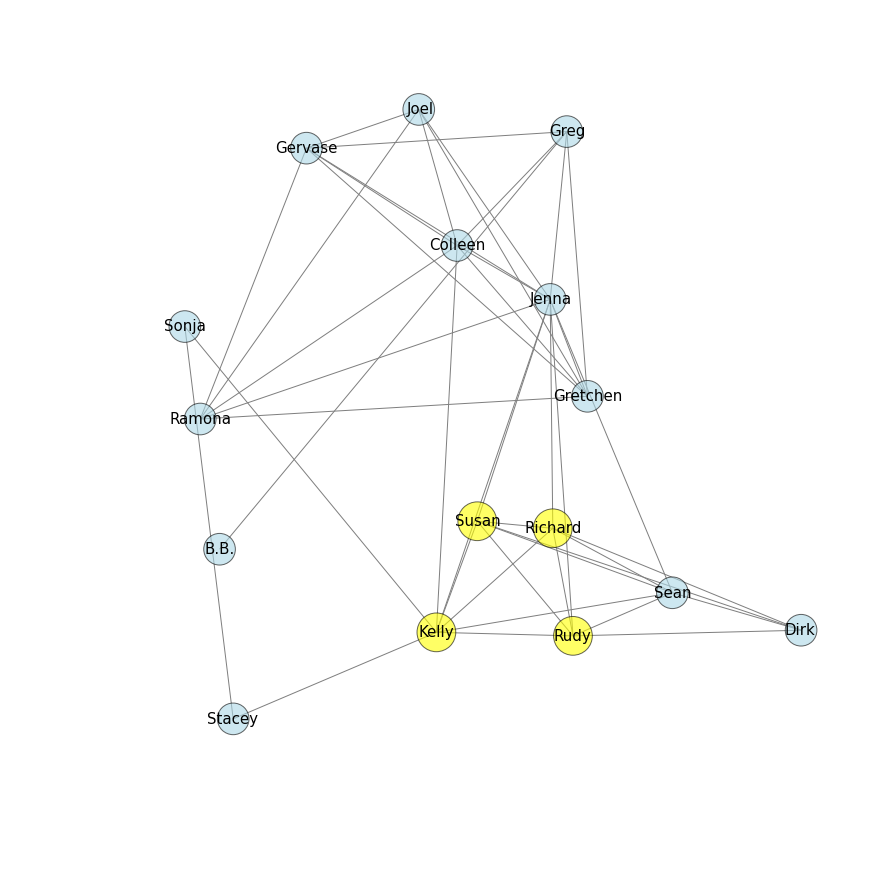

In [13]:
example_season = 'Borneo'
example_graph = graphs[example_season]
example_votes = voteweights[example_season]

# No edge weights
draw_graph(example_graph, example_votes)

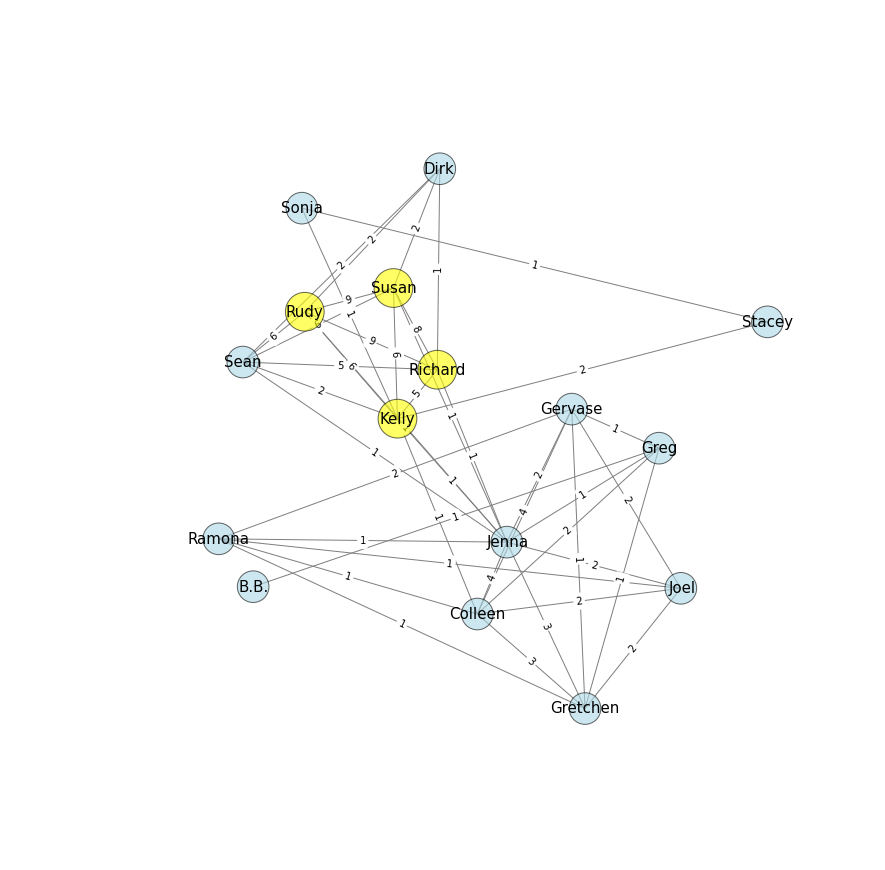

In [14]:
# With edge weights
draw_graph(example_graph, example_votes, weighted=True)

### Compare with later season (Cagayan)

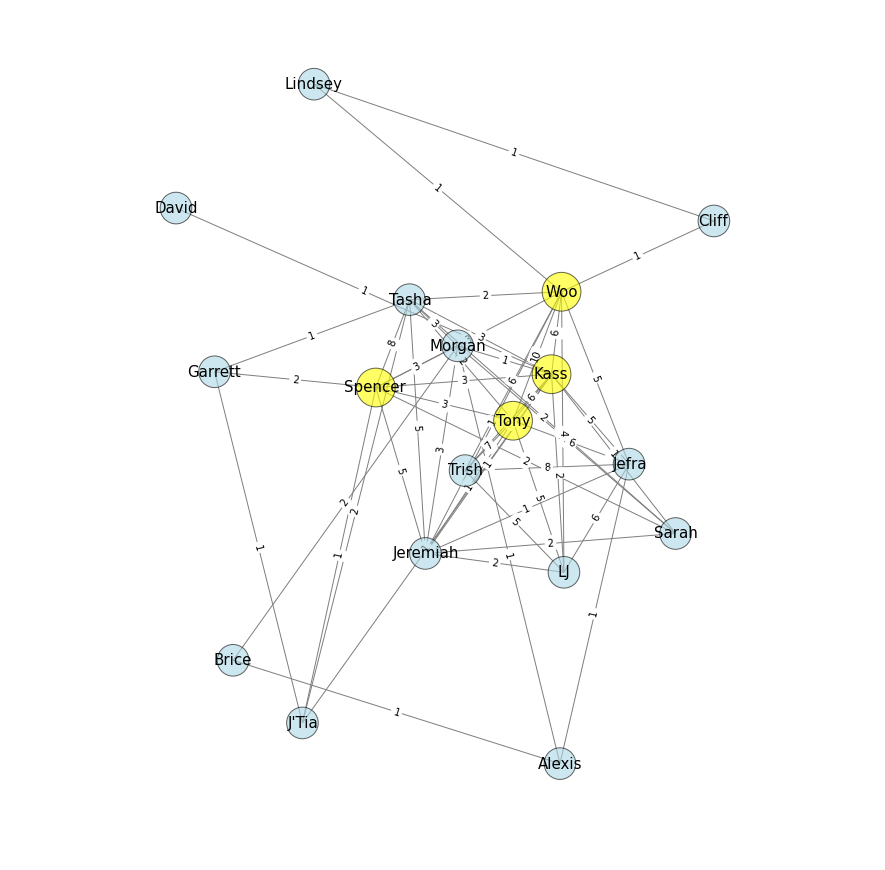

In [15]:
example_season2 = 'Cagayan'
example_graph2 = graphs[example_season2]
example_votes2 = voteweights[example_season2]
draw_graph(example_graph2, example_votes2, weighted=True)

> The general narrative may be that earlier seasons had tighter alliances and less shifting of votes. The Borneo graph depicts this close foursome where as Cagayan's top 4 is more spread out. Cagayan's network also seems to have more weighted edges overall. We examine these network and node characteristics in more detail in <a href="network.ipynb"> network.ipynb </a>.